In [2]:
import pandas as pd

# 생활정도에 따른 범죄율

In [226]:
df = pd.read_csv('dataset/criminal_lifestyle.csv', 
                 encoding='utf-8')
df_life = df.loc[:,"범죄중분류":"생활정도(상류)"]
df_life.head()

,범죄중분류,생활정도(계),생활정도(하류),생활정도(중류),생활정도(상류)
0,살인기수,379,238,70,3
1,살인미수등,616,429,114,7
2,강도,"1,716","1,201",347,9
3,강간,"5,829","2,361","1,714",81
4,유사강간,598,292,196,6


#### <font color="#007acc"> row, column 뒤집기 :df.T </font>

In [207]:
# df = df.T
# df.head()

In [234]:
df_life.drop(["생활정도(계)"], axis=1, inplace=True)

KeyError: "['생활정도(계)'] not found in axis"

In [235]:
df_life.set_index('범죄중분류', inplace=True)
df_life.head()

,생활정도(하류),생활정도(중류),생활정도(상류)
범죄중분류,,,
살인기수,238,70,3
살인미수등,429,114,7
강도,"1,201",347,9
강간,"2,361","1,714",81
유사강간,292,196,6


In [236]:
column_list = list(df_life.columns)

for c in column_list :
    print(c)
    df_life[c] = df_life[c].str.replace(',','')
    df_life[c] = df_life[c].astype(int)

df_life.head()

생활정도(하류)
생활정도(중류)
생활정도(상류)


C:\Users\guseo\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\guseo\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,생활정도(하류),생활정도(중류),생활정도(상류)
범죄중분류,,,
살인기수,238,70,3
살인미수등,429,114,7
강도,1201,347,9
강간,2361,1714,81
유사강간,292,196,6


In [237]:
# df_life = df_life.sort_values(["생활정도(계)"], ascending=False)
df_life.head()

,생활정도(하류),생활정도(중류),생활정도(상류)
범죄중분류,,,
살인기수,238,70,3
살인미수등,429,114,7
강도,1201,347,9
강간,2361,1714,81
유사강간,292,196,6


In [238]:
df_life.rename(columns={
            df_life.columns[0] : '저소득층',
            df_life.columns[1] : '중산층',
            df_life.columns[2] : '상류층',},
            inplace=True)

df_life.head()

C:\Users\guseo\Anaconda3\envs\py36\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,저소득층,중산층,상류층
범죄중분류,,,
살인기수,238,70,3
살인미수등,429,114,7
강도,1201,347,9
강간,2361,1714,81
유사강간,292,196,6


In [260]:
import numpy as np
df_life['합계'] = df_life['저소득층'] + df_life['중산층'] + df_life['상류층']
df_life['저소득층 범죄율'] = ((df_life['저소득층']/df_life['합계'])*100)
df_life['중산층 범죄율'] = ((df_life['중산층']/df_life['합계'])*100)
df_life['상류층 범죄율'] = ((df_life['상류층']/df_life['합계'])*100)

df_life.head()

,저소득층,중산층,상류층,합계,저소득층 범죄율,중산층 범죄율,상류층 범죄율
범죄중분류,,,,,,,
강도,1201,347,9,1557,77.135517,22.286448,0.578035
병역범죄,10193,4714,90,14997,67.966927,31.432953,0.600120
도박범죄,19806,12178,215,32199,61.511227,37.821050,0.667723
방화,903,350,9,1262,71.553090,27.733756,0.713154
교통범죄,234590,149783,2837,387210,60.584696,38.682627,0.732677


In [261]:
df_life = df_life.sort_values(["저소득층 범죄율"], ascending=False)
df_life.head()

,저소득층,중산층,상류층,합계,저소득층 범죄율,중산층 범죄율,상류층 범죄율
범죄중분류,,,,,,,
살인미수등,429,114,7,550,78.000000,20.727273,1.272727
강도,1201,347,9,1557,77.135517,22.286448,0.578035
살인기수,238,70,3,311,76.527331,22.508039,0.964630
사기,80792,30107,908,111807,72.260234,26.927652,0.812114
통화,67,25,1,93,72.043011,26.881720,1.075269


In [262]:
df_life = df_life.sort_values(["중산층 범죄율"], ascending=False)
df_life.head()

,저소득층,중산층,상류층,합계,저소득층 범죄율,중산층 범죄율,상류층 범죄율
범죄중분류,,,,,,,
직무유기,30,126,2,158,18.987342,79.746835,1.265823
직권남용,22,69,7,98,22.448980,70.408163,7.142857
증수뢰,192,354,70,616,31.168831,57.467532,11.363636
환경범죄,1394,1766,182,3342,41.711550,52.842609,5.445841
선거범죄,416,563,93,1072,38.805970,52.518657,8.675373


In [263]:
df_life = df_life.sort_values(["상류층 범죄율"], ascending=False)
df_life.head()

,저소득층,중산층,상류층,합계,저소득층 범죄율,중산층 범죄율,상류층 범죄율
범죄중분류,,,,,,,
증수뢰,192,354,70,616,31.168831,57.467532,11.363636
안보범죄,48,21,8,77,62.337662,27.272727,10.389610
선거범죄,416,563,93,1072,38.805970,52.518657,8.675373
직권남용,22,69,7,98,22.448980,70.408163,7.142857
보건범죄,9561,7935,1331,18827,50.783449,42.146917,7.069634


#### <font color="#007acc">상관 계수 구하기</font>

상관 계수의 절댓값이 클 수록 두 데이터는 관계가 높다.

참고 : [위키 - 상관분석](https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D)

1. 상관계수 0.1 이하 : 거의 무시 
2. 상관계수 0.3 이하 : 약한 상관 관계 
3. 상관계수 0.7 이하 : 뚜렷한 상관관계
4. 상관계수 0.7 이상 : 강한 상관관계

In [264]:
np.corrcoef(df_life['저소득층 범죄율'], df_life['합계'])

array([[1.       , 0.1137274],
       [0.1137274, 1.       ]])

In [265]:
np.corrcoef(df_life['중산층 범죄율'], df_life['합계'])

array([[ 1.        , -0.07703699],
       [-0.07703699,  1.        ]])

In [266]:
np.corrcoef(df_life['상류층 범죄율'], df_life['합계'])

array([[ 1.        , -0.21591087],
       [-0.21591087,  1.        ]])

In [267]:
import matplotlib.pyplot as plt
%matplotlib inline

In [268]:
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

path = "c:/Windows/Fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

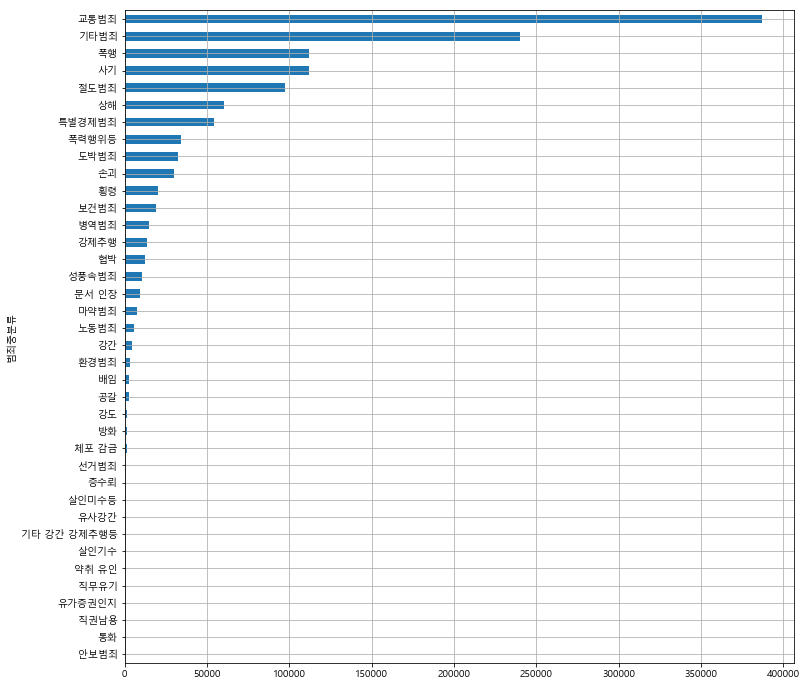

In [269]:
df_life['합계'].sort_values().plot(kind='barh', grid=True, figsize=(12,12))
plt.show()

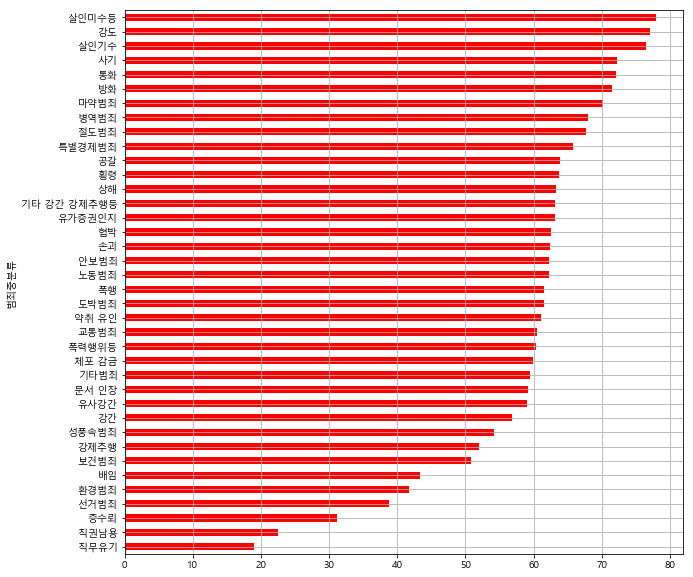

In [296]:
low = df_life['저소득층 범죄율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), color='r')
plt.show()

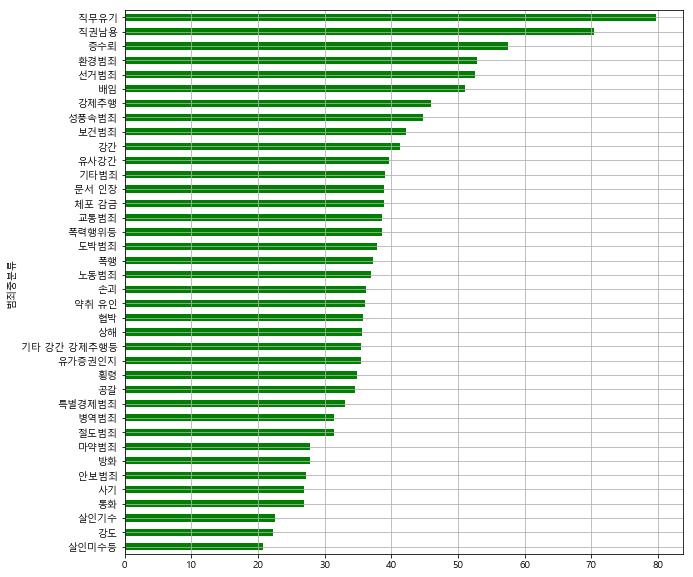

In [297]:
middle = df_life['중산층 범죄율'].sort_values().plot(kind='barh', grid=True, figsize=(10,10), color='g')
plt.show()

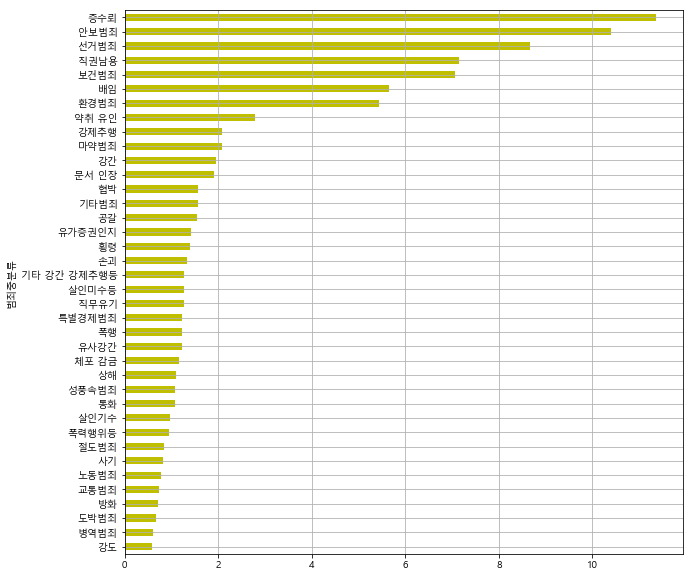

In [312]:
high = df_life['상류층 범죄율'].sort_values().plot(kind='barh', grid=True, color='y',figsize=(10,10))
plt.show()

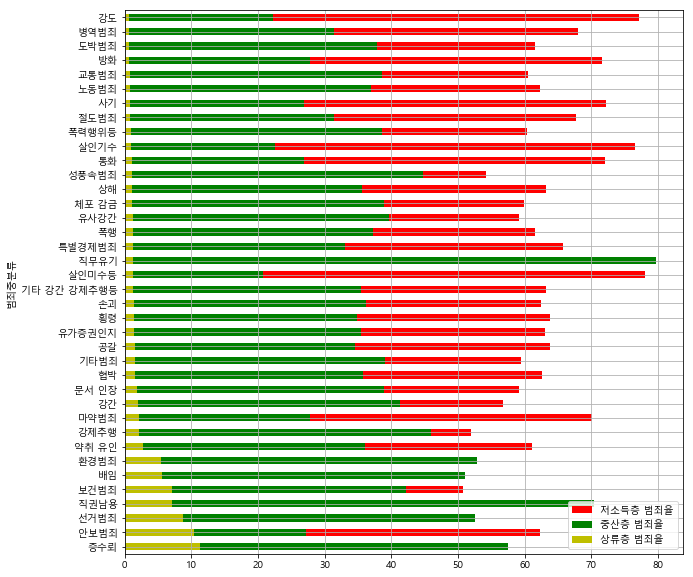

In [311]:
plt.figure(figsize=(14,10))
df_life['저소득층 범죄율'].plot(kind='barh', stacked=True, grid=True, figsize=(10,10), color='r')
df_life['중산층 범죄율'].plot(kind='barh', stacked=True, grid=True, figsize=(10,10), color='g')
df_life['상류층 범죄율'].plot(kind='barh', grid=True, figsize=(10,10), color='y')
plt.legend()
plt.show()

In [ ]:
http://statkclee.github.io/raspberry-pi/rpi-sorting-matplotlib.html
    
움직이는 그래프 